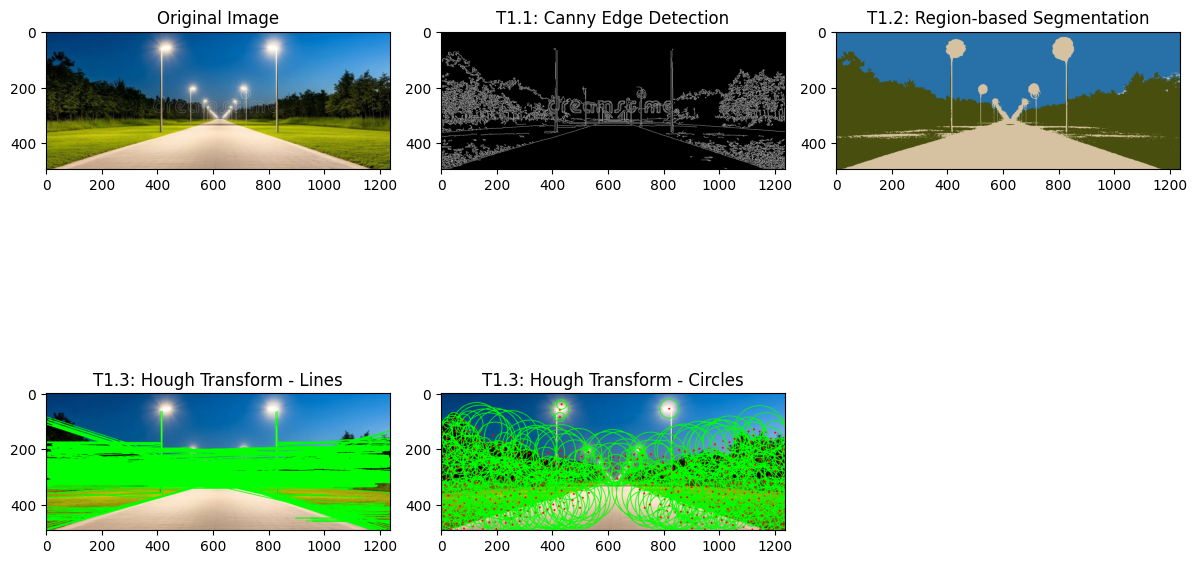

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/tunnel.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

""" T1.1 - Edge-based segmentation (Canny Edge Detection)"""
edges = cv2.Canny(gray, 50, 150)

""" T1.2 - Region-based segmentation """
def region_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    _, labels, centers = cv2.kmeans(pixel_values, k, None,
                                    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2),
                                    10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)

    return segmented_image

segmented_img = region_segmentation(image, k=3)

""" T1.3 - Hough Transform for Line and Circle Detection
Hough Line Transform"""
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
line_img = image.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

""" Hough Circle Transform"""
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=100)
circle_img = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (0, 0, 255), 3)


plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(2, 3, 2), plt.imshow(edges, cmap="gray"), plt.title("T1.1: Canny Edge Detection")
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)), plt.title("T1.2: Region-based Segmentation")
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB)), plt.title("T1.3: Hough Transform - Lines")
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB)), plt.title("T1.3: Hough Transform - Circles")

plt.tight_layout()
plt.show()



0: 640x640 11 cars, 2 trucks, 3 traffic lights, 9.7ms
Speed: 3.8ms preprocess, 9.7ms inference, 226.8ms postprocess per image at shape (1, 3, 640, 640)


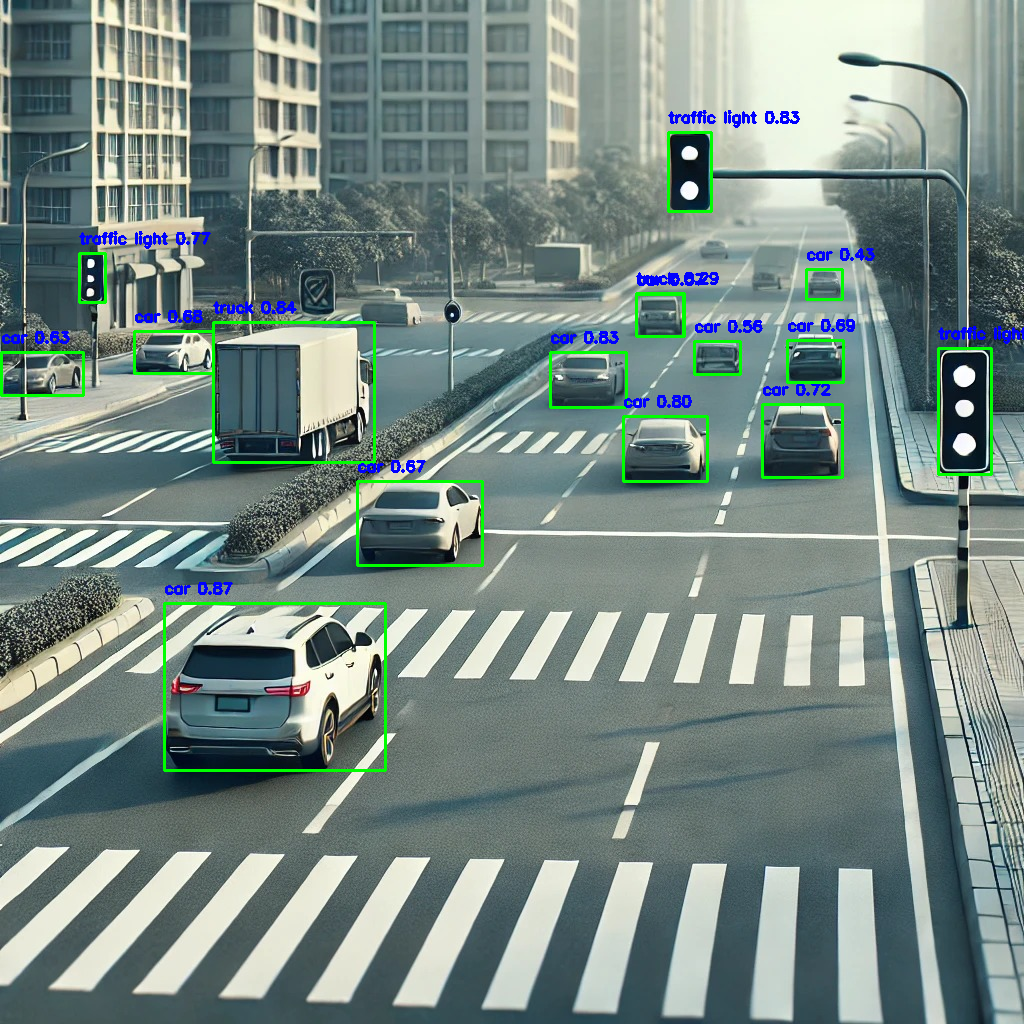

In [ ]:
!pip install ultralytics
import cv2
import torch
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from torchvision import models, transforms
from PIL import Image

model = YOLO('yolov8n.pt')

image_path = "/content/car.jpg"

image = cv2.imread(image_path)


results = model(image)


for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        label = result.names[int(box.cls)]
        confidence = box.conf[0].item()


        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, f"{label} {confidence:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)


cv2_imshow(image)


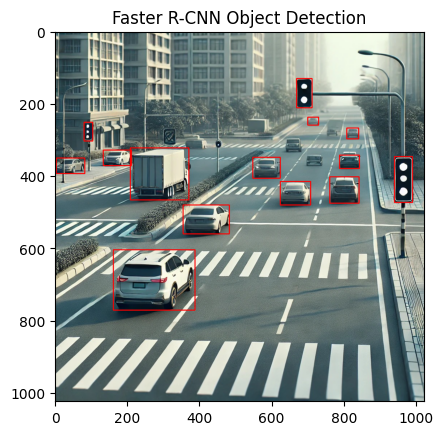

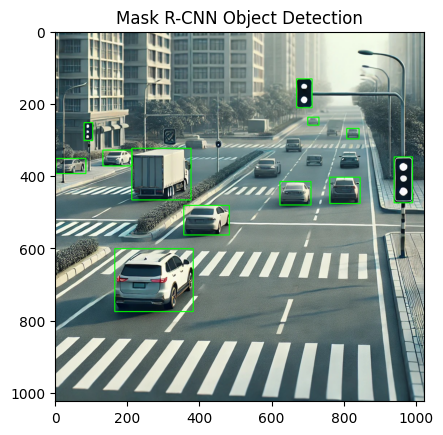

In [ ]:
def faster_rcnn_object_detection(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])

    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    image_np = np.array(image)
    for i, box in enumerate(predictions[0]['boxes']):
        if predictions[0]['scores'][i] > 0.8:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(image_np)
    plt.title("Faster R-CNN Object Detection")
    plt.show()

def mask_rcnn_object_detection(image_path):
    model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])

    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        predictions = model(image_tensor)

    image_np = np.array(image)
    for i, box in enumerate(predictions[0]['boxes']):
        if predictions[0]['scores'][i] > 0.8:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(image_np)
    plt.title("Mask R-CNN Object Detection")
    plt.show()

image_path = "/content/car.jpg"
faster_rcnn_object_detection(image_path)
mask_rcnn_object_detection(image_path)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Random Fashion-MNIST image saved at: fashion_random.png
Random CIFAR-100 image saved at: cifar_random.png


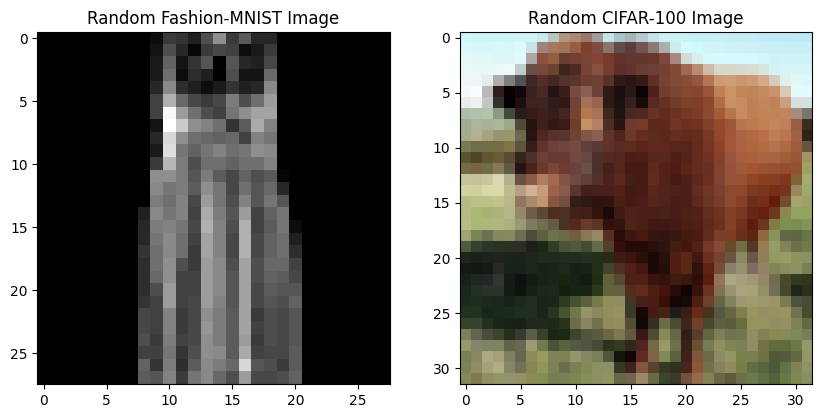

Applying YOLO on Fashion-MNIST dataset...
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/fashion_random.png: 640x640 (no detections), 7.9ms
Speed: 14.6ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Applying Faster R-CNN on CIFAR-100 dataset...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


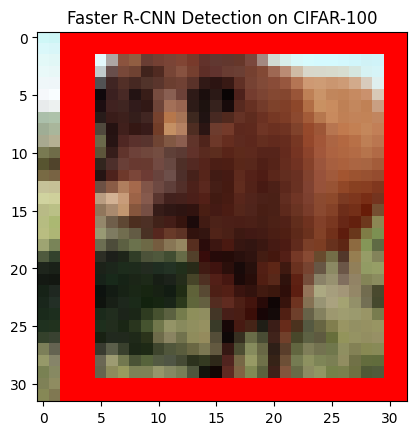

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
from tensorflow import keras
from ultralytics import YOLO
from torchvision import transforms, models
from PIL import Image

# Load Fashion-MNIST dataset
def load_fashion_mnist():
    (x_train, y_train), _ = keras.datasets.fashion_mnist.load_data()
    x_train = np.expand_dims(x_train, axis=-1) / 255.0
    return x_train

# Load CIFAR-100 dataset
def load_cifar100():
    (x_train, y_train), _ = keras.datasets.cifar100.load_data()
    x_train = x_train / 255.0
    return x_train

# Select a random image from Fashion-MNIST and save it
def get_random_fashion_mnist_image():
    x_train = load_fashion_mnist()
    idx = random.randint(0, len(x_train) - 1)
    image = (x_train[idx] * 255).astype(np.uint8).squeeze()
    image_path = "fashion_random.png"
    Image.fromarray(image).convert("RGB").save(image_path)
    return image_path

# Select a random image from CIFAR-100 and save it
def get_random_cifar100_image():
    x_train = load_cifar100()
    idx = random.randint(0, len(x_train) - 1)
    image = (x_train[idx] * 255).astype(np.uint8)
    image_path = "cifar_random.png"
    Image.fromarray(image).save(image_path)
    return image_path

# Preprocess image for RCNN
def preprocess_image(image):
    image_resized = cv2.resize(image, (224, 224))


    if image.shape[-1] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)


    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    image_tensor = transform(image).unsqueeze(0)
    return image_tensor

# YOLO Detection on Fashion-MNIST
def detect_fashion_mnist_with_yolo(image_path):
    model = YOLO('yolov8n.pt')
    results = model(image_path, save=True, show=True)
    return results

# Faster R-CNN Detection on CIFAR-100
def detect_cifar100_with_rcnn(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)

    image_tensor = preprocess_image(image_np)

    with torch.no_grad():
        predictions = model(image_tensor)

    # Draw bounding boxes
    for i in range(len(predictions[0]['boxes'])):
        box = predictions[0]['boxes'][i].numpy()
        score = predictions[0]['scores'][i].item()
        if score > 0.5:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image_np, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(image_np)
    plt.title('Faster R-CNN Detection on CIFAR-100')
    plt.show()

# Main function to run both detections
def process_images():
    # Randomly select images
    image_path_fashion = get_random_fashion_mnist_image()
    image_path_cifar = get_random_cifar100_image()

    print(f"Random Fashion-MNIST image saved at: {image_path_fashion}")
    print(f"Random CIFAR-100 image saved at: {image_path_cifar}")

    # Show randomly selected images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(image_path_fashion), cmap='gray')
    plt.title("Random Fashion-MNIST Image")

    plt.subplot(1, 2, 2)
    plt.imshow(Image.open(image_path_cifar))
    plt.title("Random CIFAR-100 Image")
    plt.show()

    print("Applying YOLO on Fashion-MNIST dataset...")
    detect_fashion_mnist_with_yolo(image_path_fashion)

    print("Applying Faster R-CNN on CIFAR-100 dataset...")
    detect_cifar100_with_rcnn(image_path_cifar)

# Run the entire process
process_images()